In [29]:
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import PySCFDriver
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.units import DistanceUnit

distance = 1.3264

molecule = Molecule(
    geometry=[
        ("Be", [0.0, 0.0, 0.0]),
        ("H", [0.0, 0.0, distance]),
        ("H", [0.0, 0.0, -distance]),
    ],
    charge=0,
    multiplicity=1,
)
driver = PySCFDriver.from_molecule(molecule=molecule, basis="sto6g")
"""
driver = PySCFDriver(
    atom="Be 0 0 0; H 0 0 1.3264; H 0 0 -1.3264",
    basis="sto6g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

"""

problem = ElectronicStructureProblem(driver)

#converter = QubitConverter(JordanWignerMapper())

In [46]:
from qiskit_nature.algorithms.ground_state_solvers import (
    GroundStateEigensolver,
    NumPyMinimumEigensolverFactory,
)

solver = GroundStateEigensolver(
    converter, NumPyMinimumEigensolverFactory(use_default_filter_criterion=False)
)

result = solver.solve(problem)

print("Classical energy = ", result.total_energies[0])
print(result)

Classical energy =  -15.759589133836796
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -19.150727774383
  - computed part:      -19.150727774383
~ Nuclear repulsion energy (Hartree): 3.391138640546
> Total ground state energy (Hartree): -15.759589133837
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 6.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.0]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  0.0]
    - computed part:      [0.0  0.0  0.0]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


In [17]:
#el_problem = problem.run()
#hamiltonian = problem.hamiltonian
print(problem)

ElectronicStructureDriverResult:
	DriverMetadata:
		Program: PYSCF
		Version: 2.0.1
		Config:
			atom=Be 0 0 0; H 0 0 1.3264; H 0 0 -1.3264
			unit=Angstrom
			charge=0
			spin=0
			basis=sto6g
			method=rhf
			conv_tol=1e-09
			max_cycle=50
			init_guess=minao
			max_memory=4000
			
	ElectronicBasisTransform:
		Initial basis: atomic
		Final basis: molecular
		Alpha coefficients:
		[0, 0] = 0.9946136153647027
		[0, 1] = -0.21519100687085155
		[0, 2] = -9.770094747839945e-16
		[0, 3] = -2.191474590892614e-17
		[0, 4] = -1.2512214110347022e-17
		[0, 5] = -0.20341023069448316
		[0, 6] = 9.01560609861094e-17
		[1, 0] = 0.021533471852859556
		[1, 1] = 0.5484991168572723
		[1, 2] = 2.4767429419206155e-15
		[1, 3] = 8.072245650286215e-17
		[1, 4] = -3.6336130962557055e-18
		[1, 5] = 1.2365393378275646
		[1, 6] = -5.49052374915694e-16
		[2, 0] = 8.373138439227081e-33
		[2, 1] = 3.712386759085778e-31
		[2, 2] = 6.549656204089854e-17
		[2, 3] = 0.8166399258357245
		[2, 4] = 0.5771474954732303
		

In [31]:
#not working
from circuit_knitting_toolbox.entanglement_forging import EntanglementForgingAnsatz
from qiskit.circuit.library import TwoLocal

ansatz = EntanglementForgingAnsatz(
    circuit_u=TwoLocal(6, ['ry','rz'], 'cz', 'full', reps=1, insert_barriers=True),
    bitstrings_u=[(1, 1, 0, 0, 0, 0), (1, 0, 1, 0, 0, 0), (1, 0, 0, 1, 0, 0), (1, 0, 0, 0, 1, 0),
                  (1, 0, 0, 0, 0, 1), (0, 1, 1, 0, 0, 0), (0, 1, 0, 1, 0, 0), (0, 1, 0, 0, 1, 0), (0, 1, 0, 0, 0, 1),
                 (0, 0, 1, 1, 0, 0), (0, 0, 1, 0, 1, 0), (0, 0, 1, 0, 0, 1), (0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 0, 1),
                 (0, 0, 0, 0, 1, 1)],
)

ansatz.circuit_u.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
«     ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                 ├
«     │                                                                                                                                                  │
«q_1: ┤1                                                                                                                                                 ├
«     │                                                                                                                                                  │
«q_2: ┤2                                                                                                                                                 ├
«     │  TwoLocal(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8],θ[9],θ[10],θ[11],θ[12],θ[13],θ[14],θ[15],θ[16],θ[17],θ[18],θ[19],θ[20],θ[21],θ[22],θ[23]) │
«q_3: ┤3                                                                                                                                                 ├
«     │                                                                                                                                                  │
«q_4: ┤4                                                                                                                                                 ├
«     │                                                                                                                                                  │
«q_5: ┤5                                                                                                                                                 ├
«     └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [35]:
from qiskit.circuit import Parameter, QuantumCircuit

theta = Parameter("θ")

hop_gate = QuantumCircuit(2, name="Hop gate")
hop_gate.h(0)
hop_gate.cx(1, 0)
hop_gate.cx(0, 1)
hop_gate.ry(-theta, 0)
hop_gate.ry(-theta, 1)
hop_gate.cx(0, 1)
hop_gate.h(0)

hop_gate.draw()

┌───┐┌───┐     ┌────────────┐     ┌───┐
q_0: ┤ H ├┤ X ├──■──┤ Ry(-1.0*θ) ├──■──┤ H ├
     └───┘└─┬─┘┌─┴─┐├────────────┤┌─┴─┐└───┘
q_1: ───────■──┤ X ├┤ Ry(-1.0*θ) ├┤ X ├─────
               └───┘└────────────┘└───┘

In [39]:
theta_1, theta_2, theta_3, theta_4 = (
    Parameter("θ1"),
    Parameter("θ2"),
    Parameter("θ3"),
    Parameter("θ4"),
)

circuit_exp = QuantumCircuit(4)
circuit_exp.append(hop_gate.to_gate({theta: theta_1}), [0, 1])
circuit_exp.append(hop_gate.to_gate({theta: theta_2}), [2, 3])
#ansatz.append(hop_gate.to_gate({theta: 0}), [1, 3])
circuit_exp.append(hop_gate.to_gate({theta: theta_3}), [0, 2])
circuit_exp.append(hop_gate.to_gate({theta: theta_4}), [1, 3])

circuit_exp.draw("text", justify="right", fold=-1)

┌───────────────┐                 ┌───────────────┐
q_0: ┤0              ├─────────────────┤0              ├
     │  Hop gate(θ1) │┌───────────────┐│               │
q_1: ┤1              ├┤0              ├┤  Hop gate(θ3) ├
     ├───────────────┤│               ││               │
q_2: ┤0              ├┤  Hop gate(θ4) ├┤1              ├
     │  Hop gate(θ2) ││               │└───────────────┘
q_3: ┤1              ├┤1              ├─────────────────
     └───────────────┘└───────────────┘

In [40]:
ansatz = EntanglementForgingAnsatz(
    circuit_u=circuit_exp,
    bitstrings_u=[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1),
                 (0, 0, 1, 1), (0, 1, 0, 1), (0,1,1,0)],
)

ansatz.circuit_u.draw()

┌───────────────┐┌───────────────┐                 
q_0: ┤0              ├┤0              ├─────────────────
     │  Hop gate(θ1) ││               │┌───────────────┐
q_1: ┤1              ├┤  Hop gate(θ3) ├┤0              ├
     ├───────────────┤│               ││               │
q_2: ┤0              ├┤1              ├┤  Hop gate(θ4) ├
     │  Hop gate(θ2) │└───────────────┘│               │
q_3: ┤1              ├─────────────────┤1              ├
     └───────────────┘                 └───────────────┘

In [41]:
from qiskit_ibm_runtime import QiskitRuntimeService, Options

service = None

backend_names = ["ibmq_qasm_simulator"]

options = [Options(execution={"shots": 1000})]

In [42]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA
from circuit_knitting_toolbox.entanglement_forging import (
    EntanglementForgingGroundStateSolver,
)

optimizer = SPSA(maxiter=100)

solver = EntanglementForgingGroundStateSolver(
    ansatz=ansatz,
    optimizer=optimizer,
    service=service,
    backend_names=backend_names,
    options=options,
    orbitals_to_reduce = [0, 3, 4],
)

In [43]:
%%capture
%%time

results = solver.solve(problem)

In [44]:
%%time
qubit_ops = solver.get_qubit_operators(problem)
print(qubit_ops)

ListOp([
  -1.8672537805027871 * IIII
  + 0.5249084088188539 * IIIZ
  + 0.02953199452800213 * IYZY
  + 0.02953199452800213 * IXZX
  + 0.5258549141203439 * IIZI
  + 0.021990686525441575 * YZYI
  + 0.021990686525441575 * XZXI
  + 0.25898010190743415 * IZII
  + 0.07531070914980396 * ZIII
  + 0.06182443806284529 * IIZZ
  - 0.009660556003620074 * YZYZ
  - 0.009660556003620074 * XZXZ
  + 0.08001865600215582 * IZIZ
  + 0.09305869587124993 * ZIIZ
  - 0.011744714150216246 * IYIY
  - 0.011744714150216246 * IXIX
  + 0.0029575739627258663 * YXXY
  + 0.020461517572464786 * YYYY
  + 0.01750394360973892 * XXYY
  + 0.01750394360973892 * YYXX
  + 0.020461517572464786 * XXXX
  + 0.0029575739627258663 * XYYX
  - 0.004887910465763385 * ZYZY
  - 0.004887910465763385 * ZXZX
  + 0.08154753290660989 * IZZI
  + 0.09145427409834914 * ZIZI
  - 0.01732514108406076 * YIYI
  - 0.01732514108406076 * XIXI
  + 0.07429604956514077 * ZZII,
  0.6647009042472644 * IIII
  - 0.16157573376454265 * IIIZ
  + 0.0386610470636476

In [83]:
#print(results)
total_energy = results.energy_shift+results.groundenergy
print("Groundstate Energy: ", total_energy)
print("Difference: ", total_energy - result.total_energies[0])
print(results)

Groundstate Energy:  -15.70123266856654
Difference:  0.05835646527025595
{   'aux_operator_eigenvalues': None,
    'eigenenergies': array([-3.80327109, -3.8107346 , -3.81372591, -3.80121704, -3.7827344 ,
       -3.78271884, -3.80327109, -3.8107346 , -3.78052033, -3.78079269,
       -3.78079269, -3.78052033, -3.7827344 , -3.78271884, -3.81372591,
       -3.80121704, -3.8107346 , -3.80327109, -3.8107346 , -3.80327109,
       -3.7827344 , -3.78271884, -3.78271884, -3.7827344 , -3.8107346 ,
       -3.80327109, -3.78271884, -3.7827344 , -3.78079269, -3.78052033,
       -3.7827344 , -3.78271884, -3.8107346 , -3.80327109, -3.8107346 ,
       -3.80327109, -3.80121704, -3.81372591, -3.78052033, -3.78079269,
       -3.80327109, -3.8107346 , -3.8107346 , -3.80327109, -3.81372591,
       -3.80121704, -3.78079269, -3.78052033, -3.80121704, -3.81372591,
       -3.7827344 , -3.78271884, -3.82086771, -3.82736402, -3.49598888,
       -2.69933241, -3.21278686, -2.95479472, -2.63685496, -3.18477936,
    

Energy:


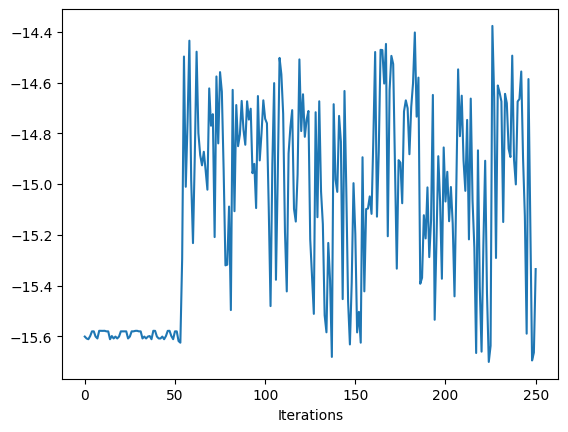

Schmidt Coefficients:


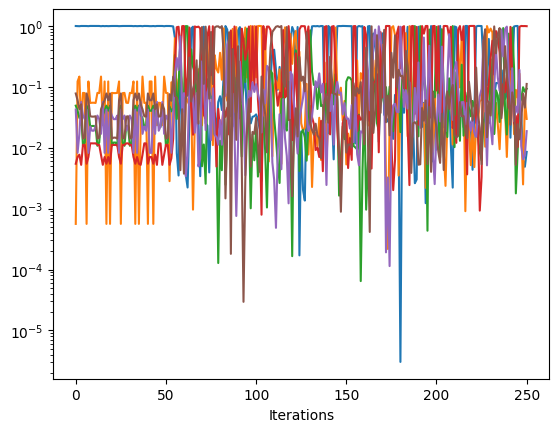

Parameters:


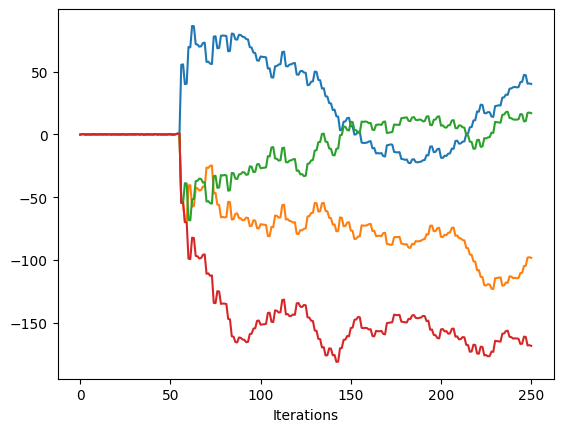

In [70]:
import matplotlib.pyplot as plt

print("Energy:")
plt.plot([evaluation.eigenvalue + results.energy_shift for evaluation in results.history])
plt.xlabel("Iterations")
plt.show()

print("Schmidt Coefficients:")
plt.plot([abs(evaluation.eigenstate) for evaluation in results.history])
plt.xlabel("Iterations")
plt.yscale("log")
plt.show()

print("Parameters:")
plt.plot([evaluation.parameters for evaluation in results.history])
plt.xlabel("Iterations")
plt.show()

In [ ]:
#next try

In [50]:
theta_1, theta_2, theta_3 = (
    Parameter("θ1"),
    Parameter("θ2"),
    Parameter("θ3"),
)

circuit_hardw = QuantumCircuit(4)
circuit_hardw.append(hop_gate.to_gate({theta: theta_1}), [0, 1])
circuit_hardw.append(hop_gate.to_gate({theta: theta_2}), [1, 2])
#ansatz.append(hop_gate.to_gate({theta: 0}), [1, 3])
circuit_hardw.append(hop_gate.to_gate({theta: theta_3}), [1, 3])
#circuit_exp.append(hop_gate.to_gate({theta: theta_4}), [1, 3])

circuit_hardw.draw("text", justify="right", fold=-1)

┌───────────────┐                                  
q_0: ┤0              ├──────────────────────────────────
     │  Hop gate(θ1) │┌───────────────┐┌───────────────┐
q_1: ┤1              ├┤0              ├┤0              ├
     └───────────────┘│  Hop gate(θ2) ││               │
q_2: ─────────────────┤1              ├┤  Hop gate(θ3) ├
                      └───────────────┘│               │
q_3: ──────────────────────────────────┤1              ├
                                       └───────────────┘

In [52]:
ansatz_hardw = EntanglementForgingAnsatz(
    circuit_u=circuit_hardw,
    bitstrings_u=[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1),
                 (0, 0, 1, 1), (0, 1, 0, 1), (0,1,1,0)],
)

ansatz_hardw.circuit_u.draw()

┌───────────────┐                                  
q_0: ┤0              ├──────────────────────────────────
     │  Hop gate(θ1) │┌───────────────┐┌───────────────┐
q_1: ┤1              ├┤0              ├┤0              ├
     └───────────────┘│  Hop gate(θ2) ││               │
q_2: ─────────────────┤1              ├┤  Hop gate(θ3) ├
                      └───────────────┘│               │
q_3: ──────────────────────────────────┤1              ├
                                       └───────────────┘

In [53]:

solver56 = EntanglementForgingGroundStateSolver(
    ansatz=ansatz_hardw,
    optimizer=optimizer,
    service=service,
    backend_names=backend_names,
    options=options,
    orbitals_to_reduce = [0, 5, 6],
)

In [54]:
%%time

results56 = solver56.solve(problem)

CPU times: user 13min 43s, sys: 6.62 s, total: 13min 49s
Wall time: 13min 25s


In [84]:
total_energy56 = results56.energy_shift+results56.groundenergy
print("Groundstate Energy: ", total_energy56)
print("Difference: ", total_energy56 - result.total_energies[0])
print(results56)

Groundstate Energy:  -15.72882571328524
Difference:  0.030763420551556564
{   'aux_operator_eigenvalues': None,
    'eigenenergies': array([-3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.88169302, -3.88169302, -3.88169302,
       -3.88169302, -3.88169302, -3.53410678, -3.51354533, -3.48408831,
       -3.46086931, -3.78817925, -3.44189327, -3.69651359, -3.80266862,
   

In [56]:
solver35 = EntanglementForgingGroundStateSolver(
    ansatz=ansatz_hardw,
    optimizer=optimizer,
    service=service,
    backend_names=backend_names,
    options=options,
    orbitals_to_reduce = [0, 3, 5],
)

In [58]:
%%time

results35 = solver35.solve(problem)
print(results35)

{   'aux_operator_eigenvalues': None,
    'eigenenergies': array([-3.82165611, -3.81736984, -3.82165611, -3.81736984, -3.81736984,
       -3.82165611, -3.81736984, -3.82165611, -3.82165611, -3.81736984,
       -3.82165611, -3.81736984, -3.82165611, -3.81736984, -3.81736984,
       -3.82165611, -3.82165611, -3.81736984, -3.81736984, -3.82165611,
       -3.82165611, -3.81736984, -3.82165611, -3.81736984, -3.82165611,
       -3.81736984, -3.82165611, -3.81736984, -3.82165611, -3.81736984,
       -3.81736984, -3.82165611, -3.82165611, -3.81736984, -3.81736984,
       -3.82165611, -3.81736984, -3.82165611, -3.82165611, -3.81736984,
       -3.81736984, -3.82165611, -3.82165611, -3.81736984, -3.81736984,
       -3.82165611, -3.82165611, -3.81736984, -3.82165611, -3.81736984,
       -3.81736984, -3.82165611, -2.92040521, -3.45173918, -3.00501813,
       -3.08658656, -3.78265486, -3.28107629, -3.52617123, -2.98410408,
       -3.27027797, -2.9542876 , -3.22778856, -3.24166946, -3.50591032,
     

In [81]:
total_energy35 = results35.energy_shift+results35.groundenergy
print("Groundstate Energy: ", total_energy35)
print("Difference: ", total_energy35 - result.total_energies[0])
print("Electronic Energy: ", results35.groundenergy)

Groundstate Energy:  -15.706505013668503
Difference:  0.053084120168293225
Electronic Energy:  -3.9084741934431695


In [59]:
#try hardware very efficient with possible omit of HF state

In [75]:
theta_1, theta_2, theta_3, theta_4 = (
    Parameter("θ1"),
    Parameter("θ2"),
    Parameter("θ3"),
    Parameter("θ4"),
)

circuit_hardwHF = QuantumCircuit(4)
circuit_hardwHF.append(hop_gate.to_gate({theta: theta_1}), [0, 1])
circuit_hardwHF.append(hop_gate.to_gate({theta: theta_2}), [2, 3])
circuit_hardwHF.cz(1,3)
circuit_hardwHF.append(hop_gate.to_gate({theta: theta_3}), [0, 1])
circuit_hardwHF.append(hop_gate.to_gate({theta: theta_4}), [2, 3])

#ansatz.append(hop_gate.to_gate({theta: 0}), [1, 3])
#circuit_hardw.append(hop_gate.to_gate({theta: theta_3}), [1, 3])
#circuit_exp.append(hop_gate.to_gate({theta: theta_4}), [1, 3])

circuit_hardwHF.draw("text", justify="right", fold=-1)

┌───────────────┐   ┌───────────────┐
q_0: ┤0              ├───┤0              ├
     │  Hop gate(θ1) │   │  Hop gate(θ3) │
q_1: ┤1              ├─■─┤1              ├
     ├───────────────┤ │ ├───────────────┤
q_2: ┤0              ├─┼─┤0              ├
     │  Hop gate(θ2) │ │ │  Hop gate(θ4) │
q_3: ┤1              ├─■─┤1              ├
     └───────────────┘   └───────────────┘

In [76]:
ansatz_hardwHF = EntanglementForgingAnsatz(
    circuit_u=circuit_hardwHF,
    bitstrings_u=[(1, 0, 1, 0), (1, 0, 0, 1),
                  (0, 1, 0, 1), (0,1,1,0)],
) #omit HF and double excitation (of the same spin)


In [77]:
solver_hardwHF = EntanglementForgingGroundStateSolver(
    ansatz=ansatz_hardwHF,
    optimizer=optimizer,
    service=service,
    backend_names=backend_names,
    options=options,
    orbitals_to_reduce = [0, 3, 4], #reducing px and py orbitals
)

In [78]:
%%time

results_hardwHF = solver_hardwHF.solve(problem)

CPU times: user 8min 16s, sys: 1.5 s, total: 8min 18s
Wall time: 8min 17s


In [80]:
total_energy_hardwHF = results_hardwHF.energy_shift+results_hardwHF.groundenergy
print("Groundstate Energy: ", total_energy_hardwHF)
print("Difference: ", total_energy_hardwHF - result.total_energies[0])
print("Electronic Energy: ", results_hardwHF.groundenergy)

Groundstate Energy:  -14.657238512891649
Difference:  1.1023506209451472
Electronic Energy:  -2.8592076926663155


In [82]:
#now try the same with HF state included

In [85]:
ansatz_hardwHFin = EntanglementForgingAnsatz(
    circuit_u=circuit_hardwHF,
    bitstrings_u=[(1, 1, 0, 0), (1, 0, 1, 0), (1, 0, 0, 1),
                  (0, 1, 0, 1), (0,1,1,0)],
)

In [86]:
solver_hardwHFin = EntanglementForgingGroundStateSolver(
    ansatz=ansatz_hardwHFin,
    optimizer=optimizer,
    service=service,
    backend_names=backend_names,
    options=options,
    orbitals_to_reduce = [0, 3, 4], #reducing px and py orbitals
)

In [87]:
%%time

results_hardwHFin = solver_hardwHFin.solve(problem)

CPU times: user 12min 48s, sys: 2.05 s, total: 12min 50s
Wall time: 12min 50s


In [88]:
total_energy_hardwHFin = results_hardwHFin.energy_shift+results_hardwHFin.groundenergy
print("Groundstate Energy: ", total_energy_hardwHFin)
print("Difference: ", total_energy_hardwHFin - result.total_energies[0])
print("Electronic Energy: ", results_hardwHFin.groundenergy)

Groundstate Energy:  -15.751499912580497
Difference:  0.008089221256298629
Electronic Energy:  -3.9534690923551636


Energy:


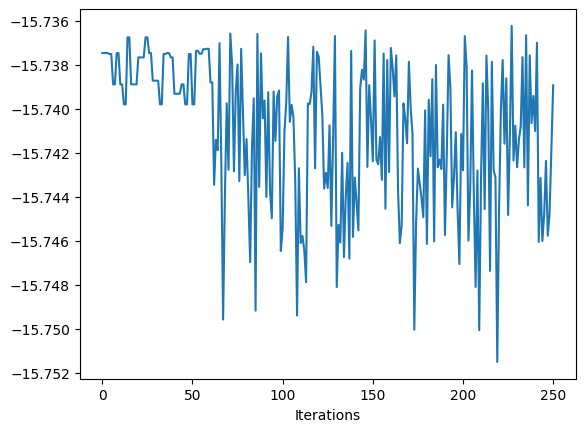

Schmidt Coefficients:


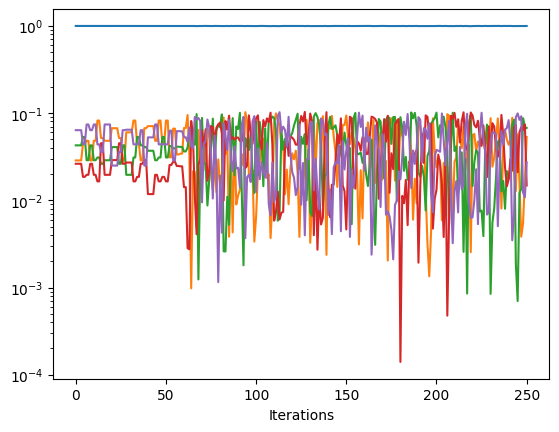

Parameters:


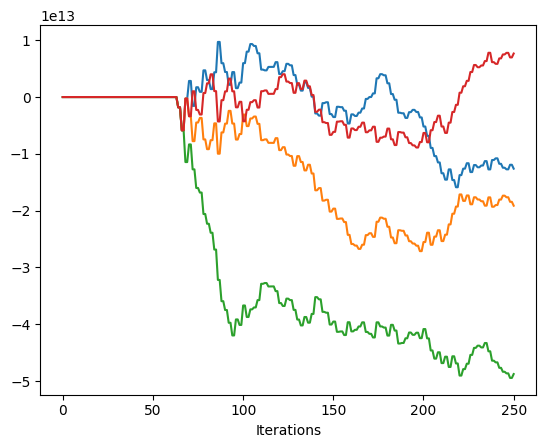

In [89]:
print("Energy:")
plt.plot([evaluation.eigenvalue + results.energy_shift for evaluation in results_hardwHFin.history])
plt.xlabel("Iterations")
plt.show()

print("Schmidt Coefficients:")
plt.plot([abs(evaluation.eigenstate) for evaluation in results_hardwHFin.history])
plt.xlabel("Iterations")
plt.yscale("log")
plt.show()

print("Parameters:")
plt.plot([evaluation.parameters for evaluation in results_hardwHFin.history])
plt.xlabel("Iterations")
plt.show()

In [90]:
print(results_hardwHFin)

{   'aux_operator_eigenvalues': None,
    'eigenenergies': array([-3.93944516, -3.93944516, -3.93944516, -3.93944516, -3.93948936,
       -3.93948936, -3.9408658 , -3.9408658 , -3.93944516, -3.93944516,
       -3.9408658 , -3.9408658 , -3.94177451, -3.94177451, -3.93873088,
       -3.93873088, -3.9408658 , -3.9408658 , -3.9408658 , -3.9408658 ,
       -3.93964209, -3.93964209, -3.93964209, -3.93964209, -3.93873088,
       -3.93873088, -3.93944516, -3.93944516, -3.94069999, -3.94069999,
       -3.94069999, -3.94069999, -3.94177451, -3.94177451, -3.93948936,
       -3.93948936, -3.93944516, -3.93944516, -3.93964209, -3.93964209,
       -3.94129272, -3.94129272, -3.94129272, -3.94129272, -3.9408658 ,
       -3.9408658 , -3.94177451, -3.94177451, -3.93948936, -3.93948936,
       -3.94177451, -3.94177451, -3.93934141, -3.93934141, -3.93947673,
       -3.93947673, -3.93926928, -3.93926928, -3.93925186, -3.93925186,
       -3.94077592, -3.94077592, -3.94542742, -3.94338828, -3.94385432,
     